In [1]:
import cv2
import imageio
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision.transforms.functional as TF

from face_alignment import FaceAlignment, LandmarksType

from utils import load_model, generate_image, plot_landmarks, generate_lm, image_to_video, generate_moving_video, generate_moving_image, get_e_vector, generate_e_vector
from dataset import preprocess_dataset,VoxCelebDataset
import network


%load_ext autoreload
%autoreload 2

## Command

``` c
python3 run.py meta-train --dataset /*dataset_path*/ --gpu --continue_id /*id*/
```

## Convert image to video

In [ ]:
image_path = ""
video_path = ""

image = cv2.imread(image_path)
image = cv2.resize(image, (256, 256))

writer = imageio.get_writer(video_path, fps=1)
for i in range(9):
    writer.append_data(image[:,:,::-1])
writer.close()

## Process Data to Vid file

In [98]:
preprocess_dataset(
                source='/home/jovyan/m',
                output = '/home/jovyan/m/',
                device='cuda' if (torch.cuda.is_available()) else 'cpu',
                size=0,
                overwrite=True,
            )

## Show image and lm

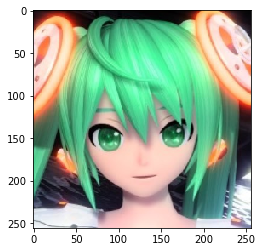

In [5]:
image_path = "/home/jovyan/m.jpg"
fa = FaceAlignment(LandmarksType._2D, device='cuda:0')

finetune_img = cv2.imread(image_path)[:,:,::-1]
finetune_img = cv2.resize(finetune_img,(256,256))

finetune_lm = generate_lm(finetune_img , fa)
plt.imshow(finetune_img)

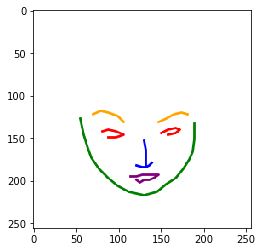

In [89]:
plt.imshow(finetune_lm)

## Generate Video

In [7]:
G = network.Generator()
G = G.to(0)
G = load_model(G, "models/", "20191214_1007")

In [8]:
e_vector = get_e_vector("./1.npy")

In [12]:
generate_moving_video(G, "../sw-01.mp4", e_vector, "test.mp4", "cuda:0", fa)

## Generate E_vector

In [3]:
E = network.Embedder()
E = E.to(0)
E = load_model(E, "models/", "20191214_1007")

In [6]:
generate_e_vector(E, "1.npy", fa, "cuda:0", video_path="/home/jovyan/tsai-01.mp4")